# 画像から顔を切り出す

In [26]:
import numpy as np
import cv2 # opencv-python
import matplotlib.pyplot as plt
import requests
import urllib
%matplotlib inline

## データの読み込みなど

In [17]:
img1_path = "../data/aragaki_00.jpeg"
img2_path = "../data/hoshino_01.jpg"
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 顔の特徴量を読み込む
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [18]:
# 画像を複数プロットする
def plot_img_list(img_list):
    for img in img_list:
        plt.imshow(img)
        plt.show()

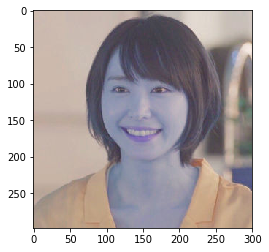

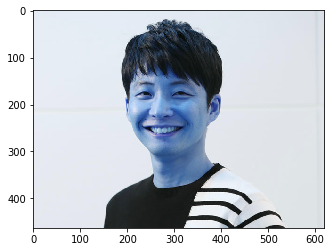

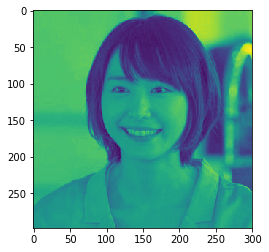

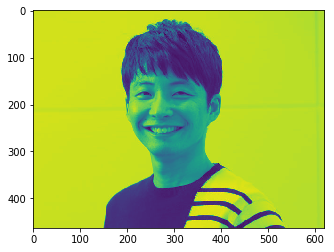

In [19]:
plot_img_list([img1, img2, img1_gray, img2_gray])

## 顔の切り出し (グレースケールで顔認識)

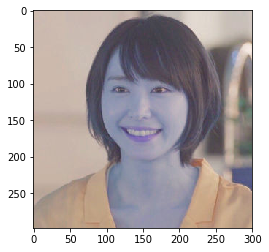

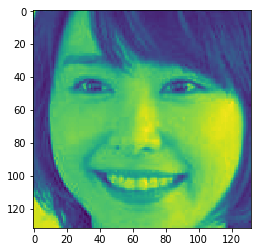

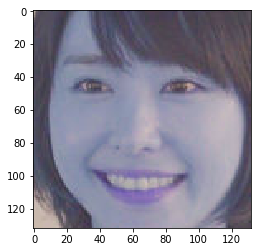

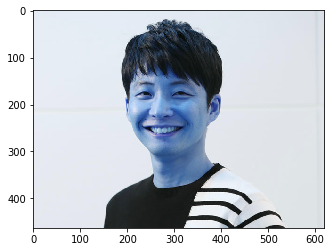

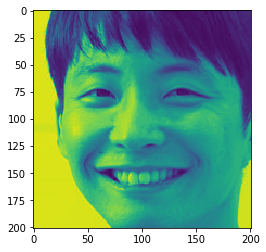

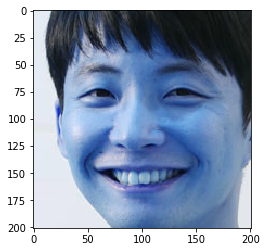

In [5]:
img1_faces = face_cascade.detectMultiScale(img1_gray, 1.3, 5)
for (x1, y1, w1, h1) in img1_faces:
#     cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
    img1_roi_gray = img1_gray[y1:y1+h1, x1:x1+w1]
    img1_roi_color = img1[y1:y1+h1, x1:x1+w1]
plot_img_list([img1, img1_roi_gray, img1_roi_color])

img2_faces = face_cascade.detectMultiScale(img2_gray, 1.3, 5)
for (x2, y2, w2, h2) in img2_faces:
#     cv2.rectangle(img2,(x2,y2),(x2+w2,y2+h2),(255,0,0),2)
    img2_roi_gray = img2_gray[y2:y2+h2, x2:x2+w2]
    img2_roi_color = img2[y2:y2+h2, x2:x2+w2]
plot_img_list([img2, img2_roi_gray, img2_roi_color])

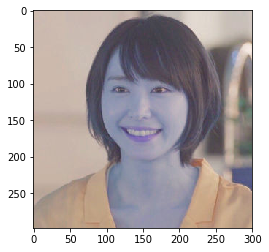

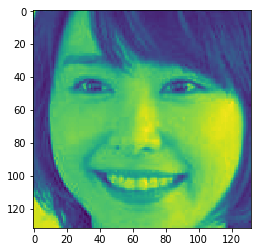

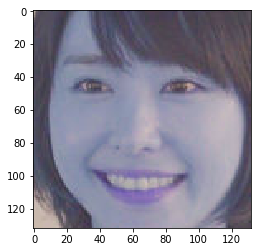

NameError: name 'img2_roi_gray' is not defined

In [21]:
img1_faces = face_cascade.detectMultiScale(img1, 1.3, 5)
for (x1, y1, w1, h1) in img1_faces:
#     cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
    img1_roi_gray = img1_gray[y1:y1+h1, x1:x1+w1]
    img1_roi_color = img1[y1:y1+h1, x1:x1+w1]
plot_img_list([img1, img1_roi_gray, img1_roi_color])

img2_faces = face_cascade.detectMultiScale(img2, 1.3, 5)
for (x2, y2, w2, h2) in img2_faces:
#     cv2.rectangle(img2,(x2,y2),(x2+w2,y2+h2),(255,0,0),2)
    img2_roi_gray = img2_gray[y2:y2+h2, x2:x2+w2]
    img2_roi_color = img2[y2:y2+h2, x2:x2+w2]
plot_img_list([img2, img2_roi_gray, img2_roi_color])

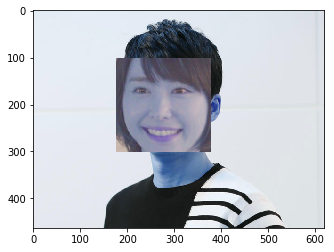

In [6]:
hoshino_aragaki = img2
aragaki_face = img1[y1:y1+h1, x1:x1+w1]
hoshino_face = img2[y2:y2+h2, x2:x2+w2]
aragaki_face = cv2.resize(aragaki_face, (hoshino_face.shape[:2]))
hoshino_aragaki[y2:y2+h2, x2:x2+w2] = aragaki_face
plot_img_list([hoshino_aragaki])

In [7]:
cv2.imwrite("../data/hoshino_aragaki.jpg", hoshino_aragaki)

True

In [6]:
res = requests.get("http://www.pinrepair.com/vgi/epiphone/60_sheraton_1.jpg")

In [10]:
res.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\xbc\x03\xb6\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x00\x07\x08\xff\xc4\x00I\x10\x00\x02\x01\x03\x03\x02\x05\x02\x03\x06\x05\x02\x05\x02\x02\x0b\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13"Qa2q\x14#\x81\x07BR\x91\xa1\xc1\x153b\xb1\xd1$r\x16C\xe1\xf0\xf14S\x82%c\x92\xa2\x17Ds\x08&d\x83\xb2\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00+\x11\x00\x02\x02\x02\x02\x02\x02\x02\x01\x04\x03\x01\x01\x00\x00\x00\x00\x01\x02\x11\x03!\x121\x0

In [29]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

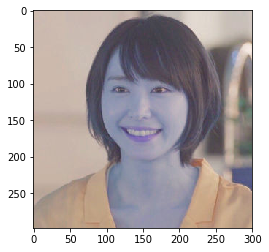

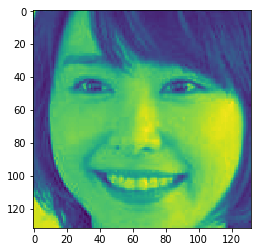

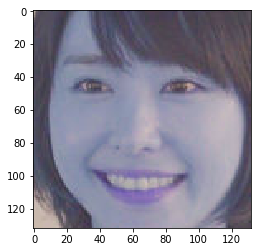

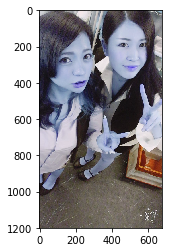

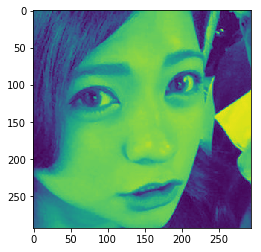

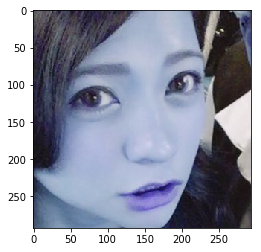

In [41]:
img1 = cv2.imread(img1_path)
img2 = url_to_image("https://pbs.twimg.com/media/DHRCUfWUAAE33F_.jpg") #  https://pbs.twimg.com/media/DHRCUfWUAAE33F_.jpg
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# plot_img_list([img1, img2, img1_gray, img2_gray])

img1_faces = face_cascade.detectMultiScale(img1_gray, 1.3, 5)
for (x1, y1, w1, h1) in img1_faces:
    img1_roi_gray = img1_gray[y1:y1+h1, x1:x1+w1]
    img1_roi_color = img1[y1:y1+h1, x1:x1+w1]
plot_img_list([img1, img1_roi_gray, img1_roi_color])

img2_faces = face_cascade.detectMultiScale(img2, 1.3, 5)
for (x2, y2, w2, h2) in img2_faces:
    img2_roi_gray = img2_gray[y2:y2+h2, x2:x2+w2]
    img2_roi_color = img2[y2:y2+h2, x2:x2+w2]
plot_img_list([img2, img2_roi_gray, img2_roi_color])

In [40]:
for (x2, y2, w2, h2) in img2_faces:
    print((x2, y2, w2, h2))

(368, 91, 277, 277)
(63, 158, 293, 293)


In [39]:
img1_faces

array([[ 84,  63, 132, 132]], dtype=int32)

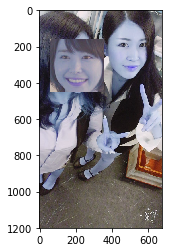

In [42]:
hoshino_aragaki = img2
aragaki_face = img1[y1:y1+h1, x1:x1+w1]
hoshino_face = img2[y2:y2+h2, x2:x2+w2]
aragaki_face = cv2.resize(aragaki_face, (hoshino_face.shape[:2]))
hoshino_aragaki[y2:y2+h2, x2:x2+w2] = aragaki_face
plot_img_list([hoshino_aragaki])

In [50]:
url = "https://pbs.twimg.com/media/DHRCUfWUAAE33F_.jpg"
url.rsplit("/")[-1].rsplit(".")

['DHRCUfWUAAE33F_', 'jpg']